<a href="https://colab.research.google.com/github/Shamil2007/DataAnalysis/blob/main/restaurant_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download rohitgrewal/restaurant-sales-data

Dataset URL: https://www.kaggle.com/datasets/rohitgrewal/restaurant-sales-data
License(s): DbCL-1.0
  0% 0.00/2.18k [00:00<?, ?B/s]
100% 2.18k/2.18k [00:00<00:00, 8.31MB/s]


In [3]:
!unzip /content/restaurant-sales-data.zip

Archive:  /content/restaurant-sales-data.zip
  inflating: 9. Sales-Data-Analysis.csv  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/content/9. Sales-Data-Analysis.csv")
df

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin
...,...,...,...,...,...,...,...,...,...
249,10709,28-12-2022,Sides & Other,4.99,200.40,Drive-thru,Gift Card,Walter Muller,Berlin
250,10710,29-12-2022,Burgers,12.99,754.43,Drive-thru,Gift Card,Walter Muller,Berlin
251,10711,29-12-2022,Chicken Sandwiches,9.95,281.41,Drive-thru,Gift Card,Walter Muller,Berlin
252,10712,29-12-2022,Fries,3.49,630.37,Drive-thru,Gift Card,Walter Muller,Berlin


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB


In [7]:
df.describe()

,Order ID,Price,Quantity
count,254.000000,254.000000,254.000000
mean,10584.133858,7.102323,460.611457
std,75.889181,4.341855,214.888699
min,10452.000000,2.950000,200.400000
25%,10520.250000,3.490000,201.010000
50%,10583.500000,4.990000,538.880000
75%,10649.750000,9.950000,677.440000
max,10713.000000,29.050000,754.430000


In [8]:
del df["Order ID"]

In [9]:
df[df.duplicated()]

,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City


In [10]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

In [11]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

#Most Preferred Payment Method ?

In [12]:
paymentMethod_counts = df.groupby("Payment Method")["Quantity"].sum()
paymentMethod_counts

,Quantity
Payment Method,
Cash,36389.97
Credit Card,52970.78
Gift Card,27634.56


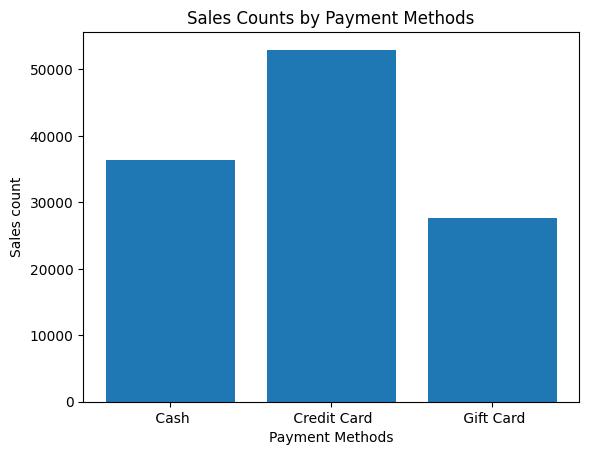

In [13]:
plt.bar(paymentMethod_counts.index, paymentMethod_counts)
plt.title("Sales Counts by Payment Methods")
plt.xlabel("Payment Methods")
plt.ylabel("Sales count")
plt.show()

The chart shows that most users prefer paying with a credit card, with over 35,000 transactions. Credit cards are convenient and easy to carry, which likely explains their popularity. Cash is the second most common payment method, possibly reflecting customers who either prefer not to use cards or do not have sufficient funds in their accounts at the time of purchase. Gift cards account for the fewest transactions, which is expected since not everyone receives or uses them.

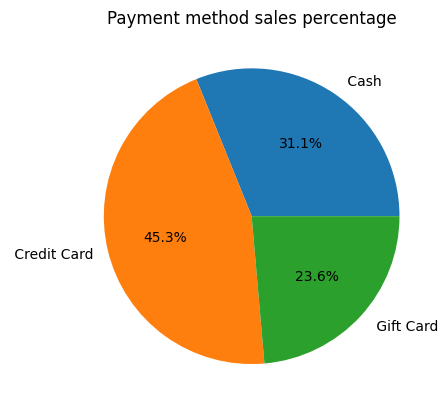

In [14]:
plt.pie(paymentMethod_counts, labels=paymentMethod_counts.index, autopct="%1.1f%%")
plt.title("Payment method sales percentage")
plt.show()

# Which Purchase Types is most useable?

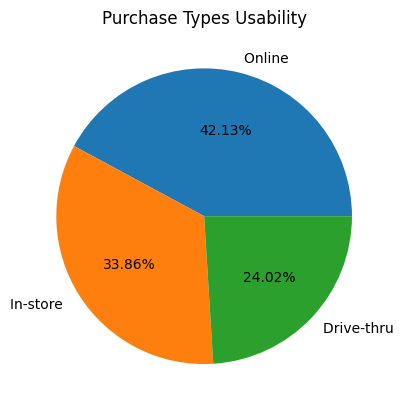

In [15]:
purchase_types = df["Purchase Type"].value_counts()

plt.pie(purchase_types, labels=purchase_types.index, autopct="%1.2f%%")
plt.title("Purchase Types Usability")
plt.show()

This data shows that online restaurant orders dominate, making up 42% of all sales, meaning most customers prefer the convenience of ordering from home or on the go. The next biggest group is in-store diners, accounting for 34%, representing people who still enjoy the traditional restaurant experience. Finally, 24% of sales come from Drive-thru, likely reflecting customers who are in a hurry and value speed over dining in.

#Most Selling Product - By Quantity & By Revenue ?

##By Quantity

In [16]:
product_sales = df.groupby("Product")["Quantity"].sum()
product_sales

,Quantity
Product,
Beverages,34983.14
Burgers,29022.31
Chicken Sandwiches,11135.92
Fries,32034.34
Sides & Other,9819.60


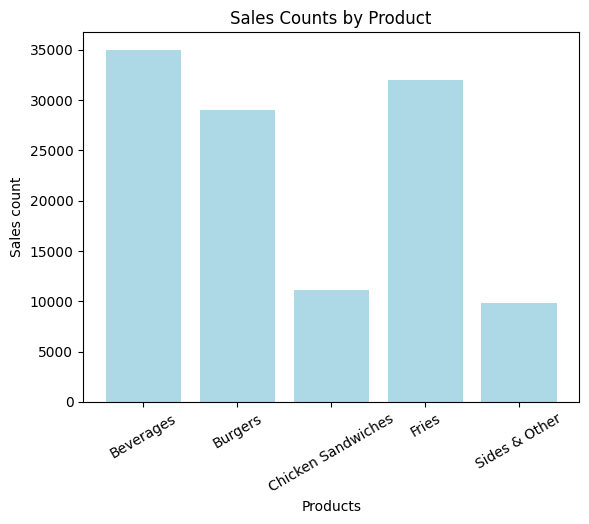

In [17]:
plt.bar(product_sales.index, product_sales, color="lightBlue")
plt.title("Sales Counts by Product")
plt.xlabel("Products")
plt.xticks(rotation=30)
plt.ylabel("Sales count")
plt.show()

Among all categories, Beverages lead the sales with a total of 34,983.14, highlighting the strong demand for drinks. Fries follow closely at 32,034.34, indicating their popularity as a key side item. Burgers come next with 29,022.31, showing they remain a core product but slightly trail beverages and fries. Chicken Sandwiches generate 11,135.92, while Sides & Other items have the lowest sales at $9,819.60, suggesting these are more occasional or complementary purchases.

##By Revenue

In [18]:
df[["Product", "Price"]].drop_duplicates()

,Product,Price
0,Fries,3.49
1,Beverages,2.95
2,Sides & Other,4.99
3,Burgers,12.99
4,Chicken Sandwiches,9.95
28,Fries,25.50
29,Chicken Sandwiches,29.05


In [19]:
df["Revenue"] = df["Price"] * df["Quantity"]
df["Revenue"]

,Revenue
0,2000.0143
1,2199.9920
2,999.9960
3,7400.0133
4,2000.0495
...,...
249,999.9960
250,9800.0457
251,2800.0295
252,2199.9913


In [20]:
product_by_revenue = df.groupby("Product")["Revenue"].sum()
product_by_revenue

,Revenue
Product,
Beverages,103200.2630
Burgers,376999.8069
Chicken Sandwiches,114641.6950
Fries,125674.2903
Sides & Other,48999.8040


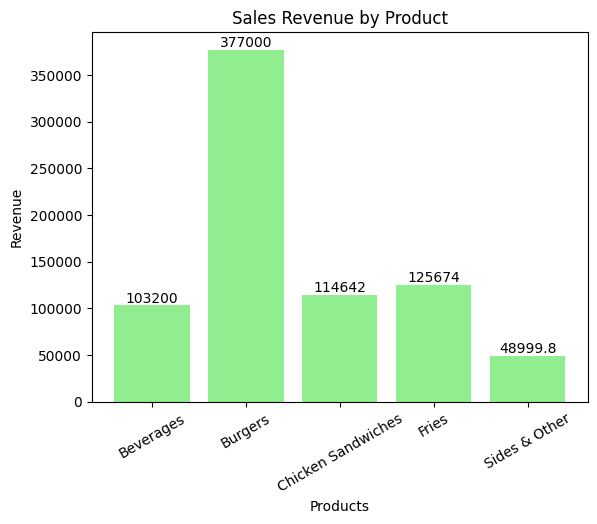

In [21]:
bars = plt.bar(product_by_revenue.index, product_by_revenue, color="lightGreen")
plt.title("Sales Revenue by Product")
plt.xlabel("Products")
plt.xticks(rotation=30)
plt.ylabel("Revenue")
plt.bar_label(bars)
plt.show()

At first glance, beverages appear to dominate sales with a total of 34,983 in individual sales and fries follow closely with 32,034. However, their low unit prices—2.95 for beverages and 3.49 for fries—mean that these impressive sales figures are driven primarily by high volume rather than high profit per item.
In contrast, burgers, priced at 12.99, generate only 29,022 in sales count but lead in total revenue, reaching 376,999, far surpassing all other categories. Similarly, chicken sandwiches (9.95) achieve a modest 11,135 in sales but still deliver $114,641 in revenue.
This reveals a clear pattern: while beverages and fries bring in customers and drive frequent purchases, higher-priced items like burgers and chicken sandwiches are the true revenue engines of the menu.

#Which city had maximum revenue?

In [22]:
city_revenue = df.groupby("City")["Revenue"].sum()
city_revenue

,Revenue
City,
Berlin,100600.1313
Lisbon,241714.1157
London,211201.0406
Madrid,136200.2665
Paris,79800.3051


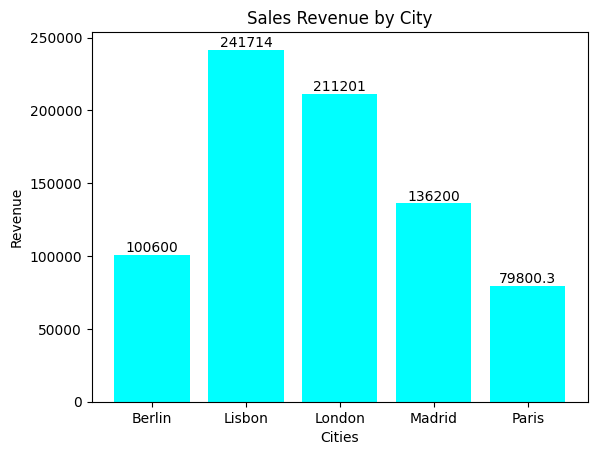

In [23]:
bars = plt.bar(city_revenue.index, city_revenue, color="cyan")
plt.title("Sales Revenue by City")
plt.xlabel("Cities")
plt.ylabel("Revenue")
plt.bar_label(bars)
plt.show()

The highest revenue comes from Lisbon, leading the chart with around 250K, showing it as the strongest market. London follows closely behind with about 210K, proving to be another key city for sales. After these two major hubs, there is a noticeable drop: Madrid is lowering in roughly 80K, which is significantly lower than London. The numbers continue to decline with Berlin at about 30K, and Paris at the bottom of the list, showing the weakest performance among the cities.

Let's see which manager managed which city's restaurant

In [24]:
df["Manager"].value_counts()

,count
Manager,
Tom Jackson,74
Joao Silva,70
Pablo Perez,36
Walter Muller,30
Remy Monet,24
Pablo Perez,7
Joao Silva,5
Remy Monet,2
Remy Monet,1


In [25]:
df["Manager"].values

array(['Tom      Jackson', '       Pablo Perez', 'Joao    Silva',
       'Walter Muller', 'Walter Muller', 'Remy    Monet', 'Walter Muller',
       'Remy Monet', 'Remy Monet', '       Remy Monet',
       '       Remy Monet', 'Remy     Monet', 'Pablo Perez',
       'Pablo Perez', 'Pablo Perez', '       Pablo Perez',
       '       Pablo Perez', '       Pablo Perez', 'Pablo   Perez',
       '       Pablo Perez', '       Pablo Perez', '       Pablo Perez',
       'Pablo Perez', 'Pablo  Perez', 'Pablo Perez', 'Pablo    Perez',
       'Pablo Perez', 'Pablo Perez', 'Joao Silva', 'Joao    Silva',
       'Joao Silva', 'Joao Silva', 'Pablo Perez', 'Pablo Perez',
       'Pablo Perez', 'Pablo Perez', 'Pablo Perez', 'Pablo Perez',
       'Pablo Perez', 'Pablo Perez', 'Pablo Perez', 'Pablo Perez',
       'Pablo Perez', 'Pablo Perez', 'Pablo Perez', 'Pablo Perez',
       'Pablo Perez', 'Pablo Perez', 'Pablo Perez', 'Pablo Perez',
       'Pablo Perez', 'Pablo Perez', 'Pablo Perez', 'Pablo Perez',
   

In [26]:
import re

df.loc[:, "Manager"] = df["Manager"].map(lambda x: re.sub(r"\s+", " ", str(x)).strip())

In [27]:
manager_cities = df.groupby(["Manager", "City"])["Revenue"].sum().sort_values(ascending=False)
manager_cities

,,Revenue
Manager,City,
Joao Silva,Lisbon,241714.1157
Tom Jackson,London,211201.0406
Pablo Perez,Madrid,136200.2665
Walter Muller,Berlin,100600.1313
Remy Monet,Paris,79800.3051


#Date wise revenue

In [28]:
date_revenue = df.groupby("Date")["Revenue"].sum().reset_index()
date_revenue

,Date,Revenue
0,2022-11-07,5200.0023
1,2022-11-08,12400.0731
2,2022-11-09,14200.0386
3,2022-11-10,13200.0426
4,2022-11-11,14400.0156
5,2022-11-12,14000.0535
6,2022-11-13,27674.4512
7,2022-11-14,17839.3445
8,2022-11-15,13600.0305
9,2022-11-16,13600.0305


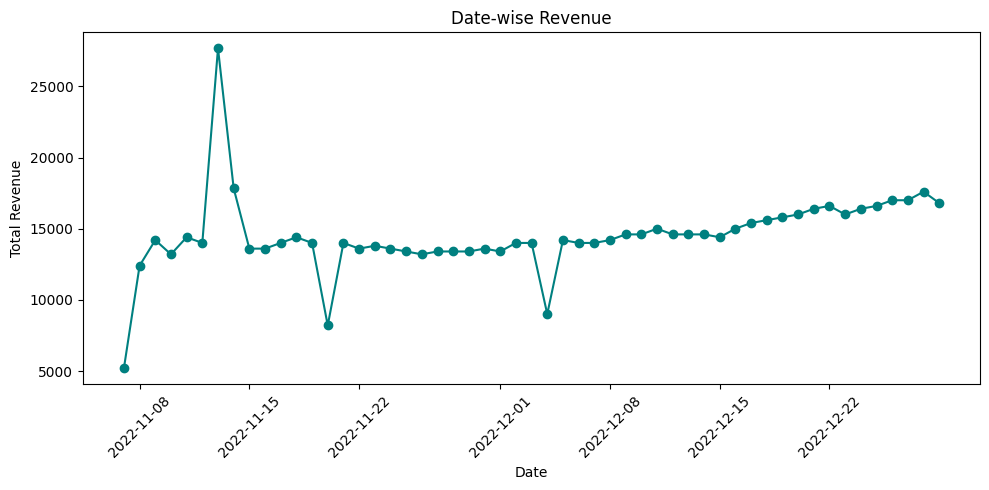

In [29]:
plt.figure(figsize=(10,5))
plt.plot(date_revenue["Date"], date_revenue["Revenue"], marker='o', color='teal')
plt.title("Date-wise Revenue")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()